In [1]:
import datetime
import ta
import warnings

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from TA_strats import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.core.common.is_list_like = pd.api.types.is_list_like
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
initial_capital=10000
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 2, 28)
vix_db = dati_giornalieri('^VIX',start_date,end_date)
db=dati_giornalieri('ETH-USD',start_date,end_date)
db = db.rename(columns = {"Open": "open","Close":"close","High":"high","Low":"low"})
total_points = len(db)
train_end = int(total_points * 0.6)
validation_end = int(total_points * 0.8)
train_db = db[:train_end]
validation_db = db[train_end:validation_end]
test_db = db[validation_end:]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Training

## Aaron

In [3]:
db_strategiaX= strategy_AROON_Xcross(train_db)
db_strategiaY= strategy_AROON_Ycross(train_db,livello=75)
db_statsX=run_backtest(db_strategiaX, initial_capital, sl=-1, tp=100)
db_statsY=run_backtest(db_strategiaY, initial_capital, sl=-1, tp=100)

## Bollinger Bands

In [4]:
db_strategia= strategy_BollingerBands(train_db, n=20)
db_stats_bb=run_backtest(db_strategia, initial_capital, sl=-5, tp=10)

for col in ['TP_price', 'Exit_TP']:
    if col not in db_stats_bb.columns:
        db_stats_bb[col] = np.nan
for col in ['Exit_Long', 'Exit_Short']:
    if col not in db_stats_bb.columns:
        db_stats_bb[col] = np.nan
db_stats_bb = db_stats_bb[['high','low','open','close','Volume','BOLL_LBAND','BOLL_UBAND','SMA','CLOSE_PREV','LONG','EXIT_LONG','SHORT','EXIT_SHORT','BUY_HOLD','RIT_BUY_HOLD','RIT_CUM',
'Data inizio T', 'Trade_side','Posizione','Entry_Long','Entry_price_L','Entry_Short','Entry_price_S',
'Data Fine T','Num_Giorni','Exit_Long','Exit_Short','TP_price','Exit_TP', 'SL_price','Exit_SL',
'P&L', 'Ritorno_perc']]

## CCI

In [5]:
db_strategia= strategy_CCI(train_db,n_cci=50,n_sma=50,livello=0)
db_stats_cci=run_backtest(db_strategia, initial_capital, sl=-5, tp=5)

In [6]:
db_strategia= strategy_CCI_2(train_db,n_cci=50,n_sma=50,livello=0)
db_stats_cci2=run_backtest(db_strategia, initial_capital, sl=-5, tp=5)

## HMA & Tether Line

In [7]:
db_strategia= strategy_HMA_Tether(train_db,n_hma=25,n_tether=50)
db_stats_hma=run_backtest(db_strategia, initial_capital, sl=-5, tp=15)

## Ichimoku

In [8]:
db_strategia= strategy_Ichimoku(train_db)
db_stats_ichimoku=run_backtest(db_strategia, initial_capital, sl=-4, tp=19)

## KAMA

In [9]:
train_db = train_db.copy()
train_db['kama'] = ta.momentum.KAMAIndicator(train_db['close'], 30, 2, 10).kama()
db_strategia_KAMA= strategy_KAMA(train_db,n=50,f=2,l=30)
db_stats_KAMA=run_backtest(db_strategia_KAMA, initial_capital, sl=-5000, tp=10000)
db_stat_KAMA = db_stats_KAMA[['high','low','open','close','Volume','kama','LONG','EXIT_LONG','SHORT','EXIT_SHORT','BUY_HOLD','RIT_CUM',
'Data inizio T', 'Trade_side','Posizione','Entry_Long','Entry_price_L','Entry_Short','Entry_price_S',
'Data Fine T','Num_Giorni','Exit_Long','Exit_Short','P&L', 'Ritorno_perc']]

## Keltner

In [10]:
db_strategia= strategy_Keltner(train_db, n=20, k=1)
db_stats_keltner=run_backtest(db_strategia, initial_capital, sl=-2, tp=5)

In [11]:
db_strategia= strategy_Keltner_break(train_db, n=20, k=1)
db_stats_keltner_break=run_backtest(db_strategia, initial_capital, sl=-2, tp=5)

## MACD

In [12]:
db_strategia= strategy_MACD(train_db)
db_stats_macd=run_backtest(db_strategia, initial_capital, sl=-2, tp=5)

for col in ['Exit_Long', 'Exit_Short']:
    if col not in db_stats_macd.columns:
        db_stats_macd[col] = np.nan
db_stats_macd = db_stats_macd[['high','low','open','close','Volume','MACD_LINE','SIG_LINE','MACD_DIFF','MACD_DIFF_PREV',
'LONG','EXIT_LONG','SHORT','EXIT_SHORT','BUY_HOLD','RIT_BUY_HOLD','RIT_CUM',
'Data inizio T', 'Trade_side','Posizione','Entry_Long','Entry_price_L','Entry_Short','Entry_price_S',
'Data Fine T','Num_Giorni','Exit_Long','Exit_Short','TP_price','Exit_TP', 'SL_price','Exit_SL',
'P&L', 'Ritorno_perc']]

## OBV

In [13]:
db_strategia= strategy_OBV(train_db)
db_stats_obv=run_backtest(db_strategia, initial_capital, sl=-2, tp=20)

## Oscillatore Stocastico

In [14]:
db_strategia= strategy_Stocastico(train_db)
db_stats_stoch=run_backtest(db_strategia, initial_capital, sl=-2, tp=2)

for col in ['Exit_Long', 'Exit_Short']:
    if col not in db_stats_stoch.columns:
        db_stats_stoch[col] = np.nan
db_stats_stoch = db_stats_stoch[['high','low','open','close','Volume','D','DD',
'LONG','EXIT_LONG','SHORT','EXIT_SHORT','BUY_HOLD','RIT_BUY_HOLD','RIT_CUM',
'Data inizio T', 'Trade_side','Posizione','Entry_Long','Entry_price_L','Entry_Short','Entry_price_S',
'Data Fine T','Num_Giorni','Exit_Long','Exit_Short', 'SL_price','Exit_SL', 'TP_price','Exit_TP',
'P&L', 'Ritorno_perc']]

## Parabolic SAR

In [15]:
db_strategia= strategy_PSAR(train_db)
db_stats_sar=run_backtest(db_strategia, initial_capital, sl=-3, tp=3)

## Williams%R

In [16]:
db_strategia= strategy_WR(train_db)
db_stats_wr=run_backtest(db_strategia, initial_capital, sl=-5, tp=10)

for col in ['Exit_Short']:
    if col not in db_stats_wr.columns:
        db_stats_wr[col] = np.nan
for col in ['Exit_Long']:
    if col not in db_stats_wr.columns:
        db_stats_wr[col] = np.nan
db_stats_wr = db_stats_wr[['high','low','open','close','Volume','WR','WR_PREV',
'LONG','EXIT_LONG','SHORT','EXIT_SHORT','BUY_HOLD','RIT_BUY_HOLD','RIT_CUM',
'Data inizio T', 'Trade_side','Posizione','Entry_Long','Entry_price_L','Entry_Short','Entry_price_S',
'Data Fine T','Num_Giorni','Exit_Long','Exit_Short','TP_price','Exit_TP', 'SL_price','Exit_SL',
'P&L', 'Ritorno_perc']]

## Report

In [17]:
report_ax = report(db_statsX,db_statsX['P&L'],db_statsX['RIT_CUM'])
report_ay = report(db_statsY,db_statsY['P&L'],db_statsY['RIT_CUM'])
report_bb = report(db_stats_bb,db_stats_bb['P&L'],db_stats_bb['RIT_CUM'])
report_cci = report(db_stats_cci,db_stats_cci['P&L'],db_stats_cci['RIT_CUM'])
report_cci2 = report(db_stats_cci2,db_stats_cci2['P&L'],db_stats_cci2['RIT_CUM'])
report_hma = report(db_stats_hma,db_stats_hma['P&L'],db_stats_hma['RIT_CUM'])
report_ichimoku = report(db_stats_ichimoku,db_stats_ichimoku['P&L'],db_stats_ichimoku['RIT_CUM'])
report_kama = report(db_stats_KAMA,db_stats_KAMA['P&L'],db_stats_KAMA['RIT_CUM'])
report_keltner = report(db_stats_keltner,db_stats_keltner['P&L'],db_stats_keltner['RIT_CUM'])
report_keltner_break = report(db_stats_keltner_break,db_stats_keltner_break['P&L'],db_stats_keltner_break['RIT_CUM'])
report_macd = report(db_stats_macd,db_stats_macd['P&L'],db_stats_macd['RIT_CUM'])
report_obv = report(db_stats_obv,db_stats_obv['P&L'],db_stats_obv['RIT_CUM'])
report_stoch = report(db_stats_stoch,db_stats_stoch['P&L'],db_stats_stoch['RIT_CUM'])
report_sar = report(db_stats_sar,db_stats_sar['P&L'],db_stats_sar['RIT_CUM'])
report_wr = report(db_stats_wr,db_stats_wr['P&L'],db_stats_wr['RIT_CUM'])

In [18]:
df_report_train = pd.DataFrame([report_ax, report_ay, report_bb, report_cci, report_cci2, report_hma, report_ichimoku, report_kama, report_keltner, report_keltner_break, report_macd, report_obv, report_stoch, report_sar, report_wr], index=['Aaron X', 'AaronY', 'Bollinger Bands', 'CCI', 'CCI2', 'HMA', 'Ichimoku', 'KAMA', 'Keltner', 'Keltner Break', 'MACD', 'OBV', 'Stochastic', 'SAR', 'W%R'])

df_report_train

Ritorno Ann  Volatilità Ann  Profitto  Profitto Buy&Hold  \
Aaron X                25.40           25.78    7582.0            74685.0   
AaronY                 70.86           37.35   28017.0            74685.0   
Bollinger Bands       -16.43           23.41   -3608.0            74685.0   
CCI                     4.51           15.45    1164.0            74685.0   
CCI2                   -3.58           15.21    -870.0            74685.0   
HMA                    16.73           20.79    4705.0            74685.0   
Ichimoku               12.53           21.27    3423.0            74685.0   
KAMA                  133.76           79.59   73062.0            74685.0   
Keltner               -11.75           13.06   -2678.0            74685.0   
Keltner Break          10.56           19.64    2845.0            74685.0   
MACD                   -4.51           15.08   -1087.0            74685.0   
OBV                    33.76           40.12   10653.0            74685.0   
Stochastic            -19.78           14.58   -4228.0            74685.0   
SAR                   -11.08           14.56   -2538.0            74685.0   
W%R                   -31.63           38.32   -6124.0            74685.0   

                 Operazioni Chiuse  Operazioni Long  Operazioni Short  \
Aaron X                         29               15                16   
AaronY                          45               26                19   
Bollinger Bands                 36               15                21   
CCI                             33               16                18   
CCI2                            31               17                16   
HMA                             23               10                13   
Ichimoku                        14               10                 4   
KAMA                            58               29                30   
Keltner                         58               29                29   
Keltner Break                  106               61                45   
MACD                            68               34                34   
OBV                            109               57                58   
Stochastic                     167               85                84   
SAR                             70               36                36   
W%R                            107               43                64   

                 Rendimento Medio  Rendimento Medio %  Dev. Std Rend. Med  \
Aaron X                     142.0                2.56               18.74   
AaronY                      623.0                4.58               17.12   
Bollinger Bands            -100.0               -1.07                6.40   
CCI                          37.0                0.59                4.81   
CCI2                        -18.0               -0.14                4.73   
HMA                         205.0                2.83                9.92   
Ichimoku                    245.0                2.92               11.33   
KAMA                        729.0                5.76               28.84   
Keltner                     -46.0               -0.64                2.80   
Keltner Break                27.0                0.34                3.28   
MACD                        -16.0               -0.10                3.15   
OBV                          96.0                1.17                7.85   
Stochastic                  -26.0               -0.33                1.97   
SAR                         -36.0               -0.38                2.99   
W%R                         -57.0               -0.53                6.81   

                 Profit Factor  Profitto Lordo  Perdita Lorda  \
Aaron X                   2.12          7810.0        -3687.0   
AaronY                    4.70         35589.0        -7572.0   
Bollinger Bands           0.64          6528.0       -10135.0   
CCI                       1.19          7591.0        -6366.0   
CCI2                      0.91          5655.0        -62

In [19]:
#df_report_train.to_excel('report_strats_training.xlsx')

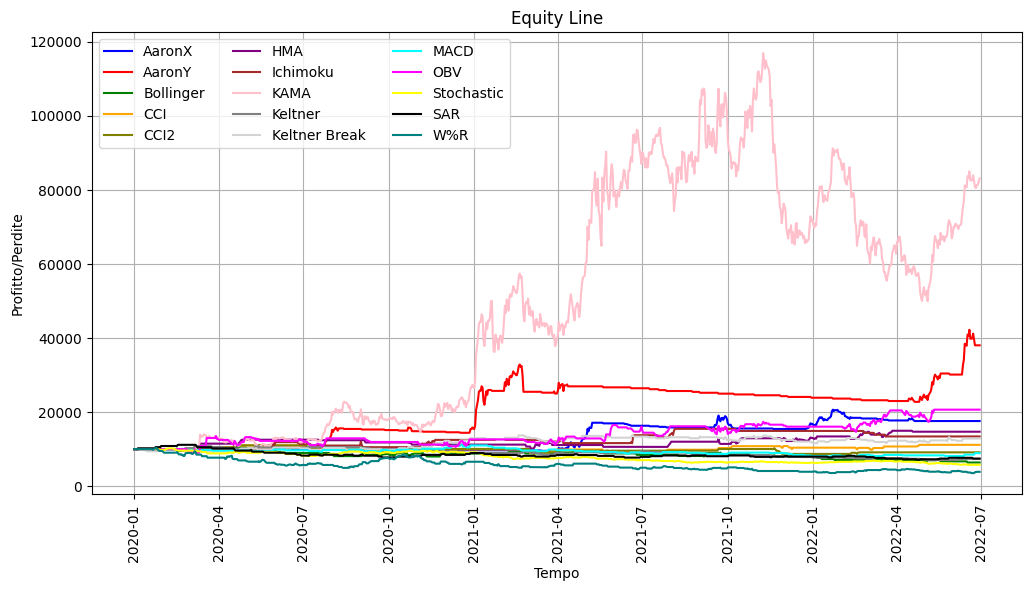

In [20]:
plot_equity(
    ('AaronX', db_statsX['RIT_CUM']),
    ('AaronY', db_statsY['RIT_CUM']),
    ('Bollinger', db_stats_bb['RIT_CUM']),
    ('CCI', db_stats_cci['RIT_CUM']),
    ('CCI2', db_stats_cci2['RIT_CUM']),
    ('HMA', db_stats_hma['RIT_CUM']),
    ('Ichimoku', db_stats_ichimoku['RIT_CUM']),
    ('KAMA', db_stats_KAMA['RIT_CUM']),
    ('Keltner', db_stats_keltner['RIT_CUM']),
    ('Keltner Break', db_stats_keltner_break['RIT_CUM']),
    ('MACD', db_stats_macd['RIT_CUM']),
    ('OBV', db_stats_obv['RIT_CUM']),
    ('Stochastic', db_stats_stoch['RIT_CUM']),
    ('SAR', db_stats_sar['RIT_CUM']),
    ('W%R', db_stats_wr['RIT_CUM']),
    colors=(
        'blue', 'red', 'green', 'orange', 'olive', 'purple',
        'brown', 'pink', 'gray', 'lightgray', 'cyan', 'magenta',
        'yellow', 'black', 'teal'
    )
)

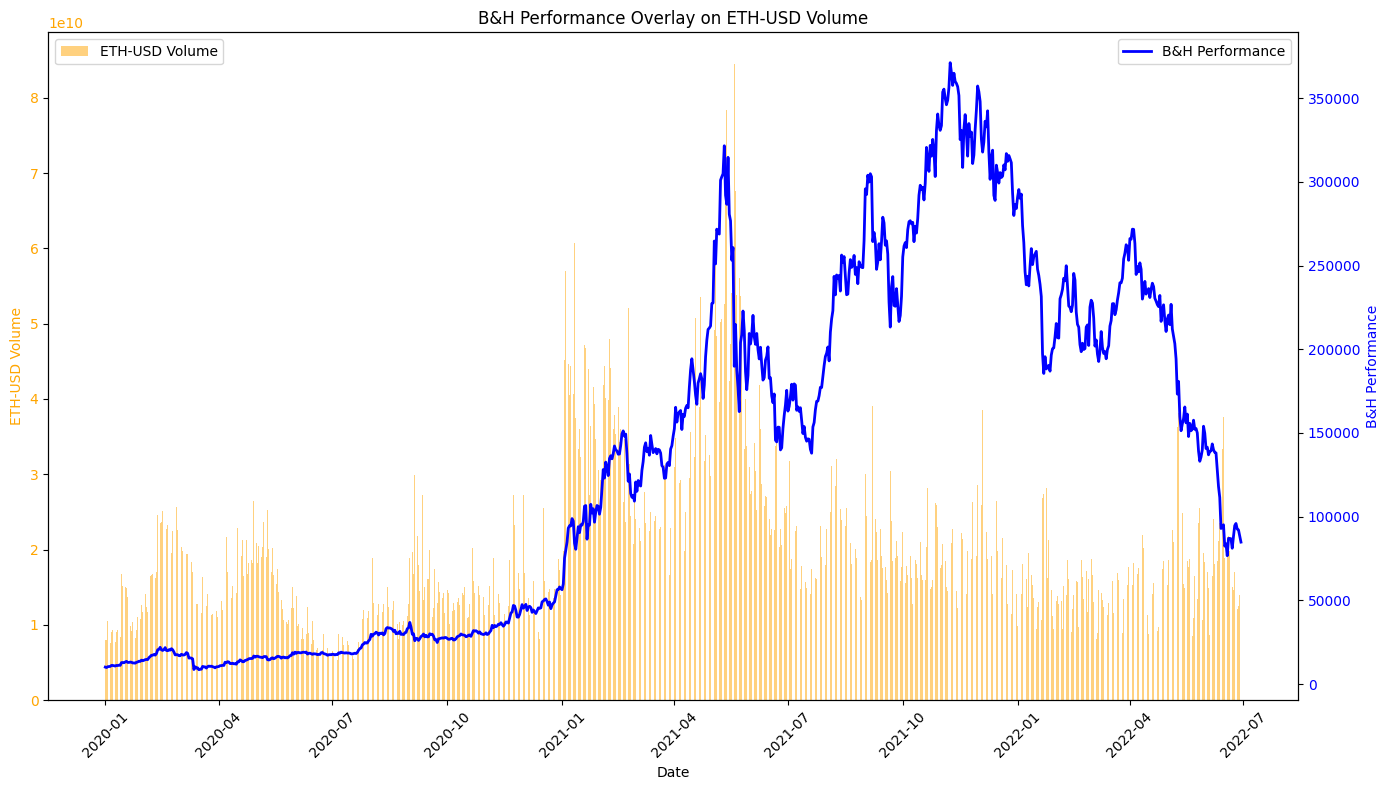

In [21]:
plot_bh_on_volume(train_db, db_stats_wr)

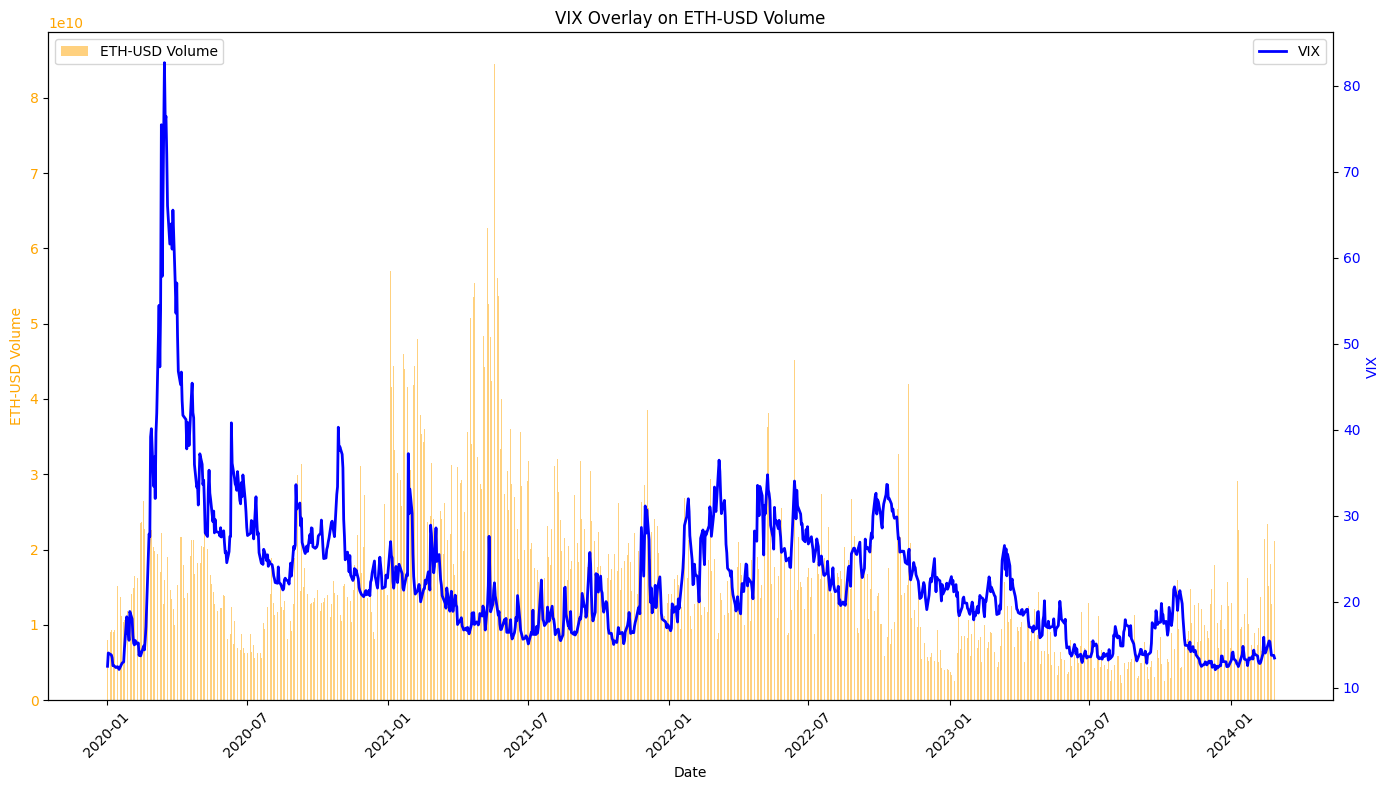

In [22]:
plot_vix_on_volume(db, vix_db)

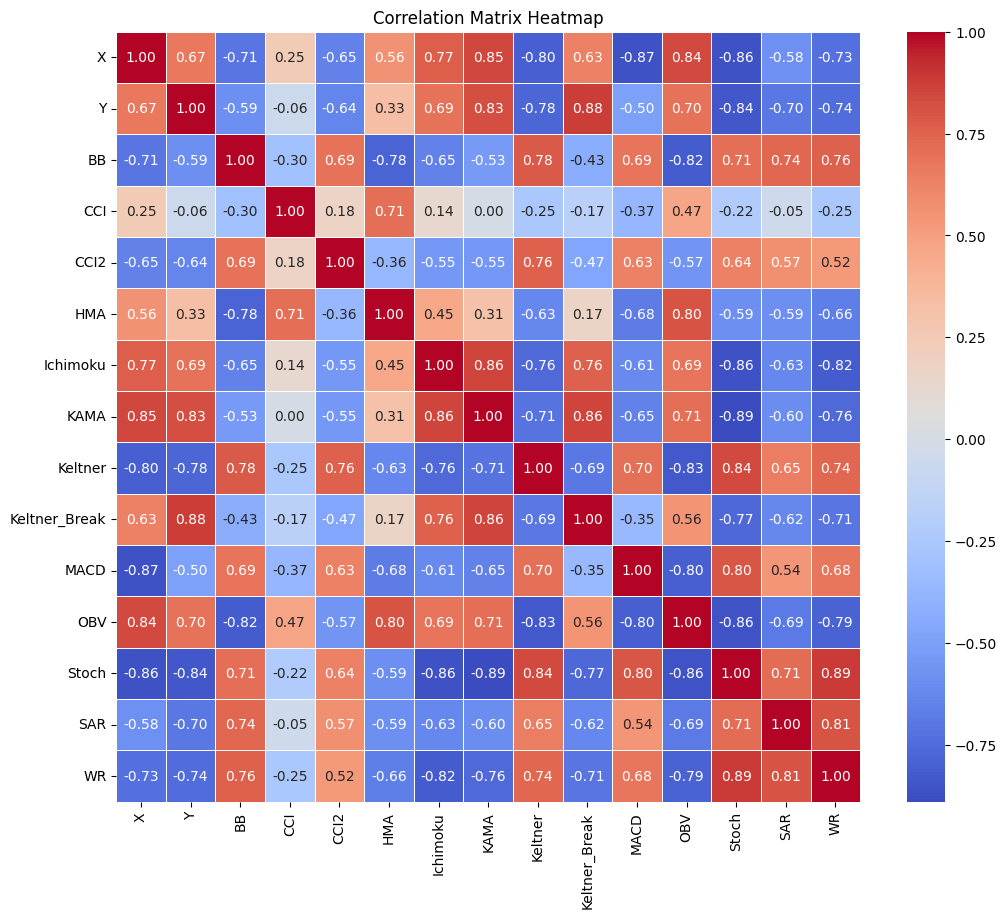

In [23]:
strategies_df = pd.DataFrame({
    'X': db_statsX['RIT_CUM'],
    'Y': db_statsY['RIT_CUM'],
    'BB': db_stats_bb['RIT_CUM'],
    'CCI': db_stats_cci['RIT_CUM'],
    'CCI2': db_stats_cci2['RIT_CUM'],
    'HMA': db_stats_hma['RIT_CUM'],
    'Ichimoku': db_stats_ichimoku['RIT_CUM'],
    'KAMA': db_stats_KAMA['RIT_CUM'],
    'Keltner': db_stats_keltner['RIT_CUM'],
    'Keltner_Break': db_stats_keltner_break['RIT_CUM'],
    'MACD': db_stats_macd['RIT_CUM'],
    'OBV': db_stats_obv['RIT_CUM'],
    'Stoch': db_stats_stoch['RIT_CUM'],
    'SAR': db_stats_sar['RIT_CUM'],
    'WR': db_stats_wr['RIT_CUM']
})
correlation_matrix = strategies_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Validation

## Aaron

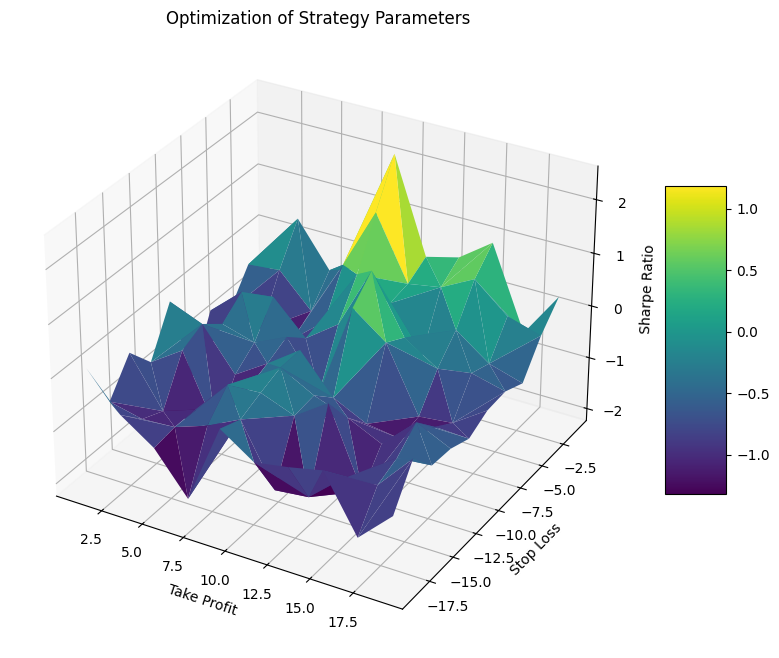

In [24]:
strategy_function = strategy_AROON_Xcross
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(20, 71, 5)
}
best_paramsX = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid,initial_capital)
db_statsX = run_backtest(strategy_function(validation_db, n=int(best_paramsX['n'])), initial_capital, best_paramsX['sl'], best_paramsX['tp'])                    

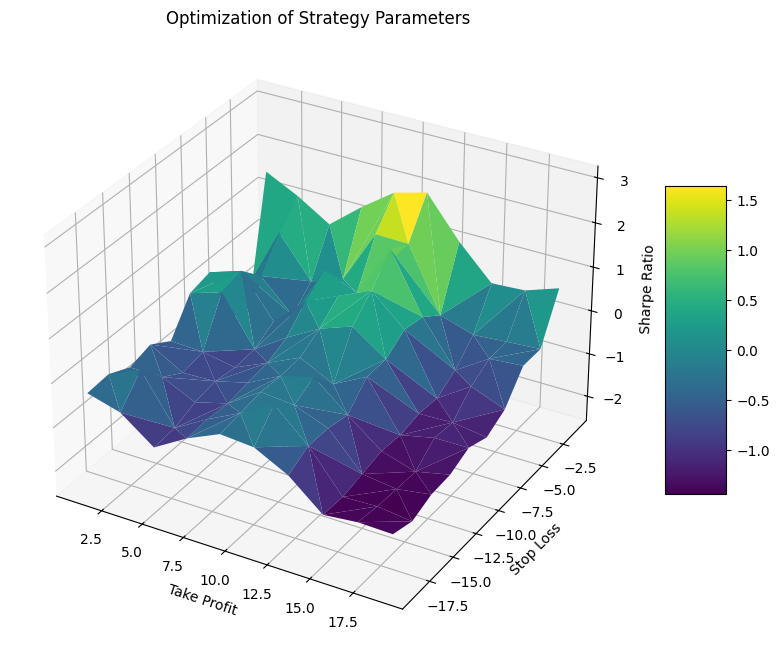

In [26]:
strategy_function = strategy_AROON_Ycross
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(20, 71, 5),
    'livello': range(50, 100, 5)
}
best_paramsY = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_statsY = run_backtest(strategy_function(validation_db, n=int(best_paramsY['n']), livello=int(best_paramsY['livello'])), initial_capital, best_paramsY['sl'], best_paramsY['tp'])

## Bollinger Bands

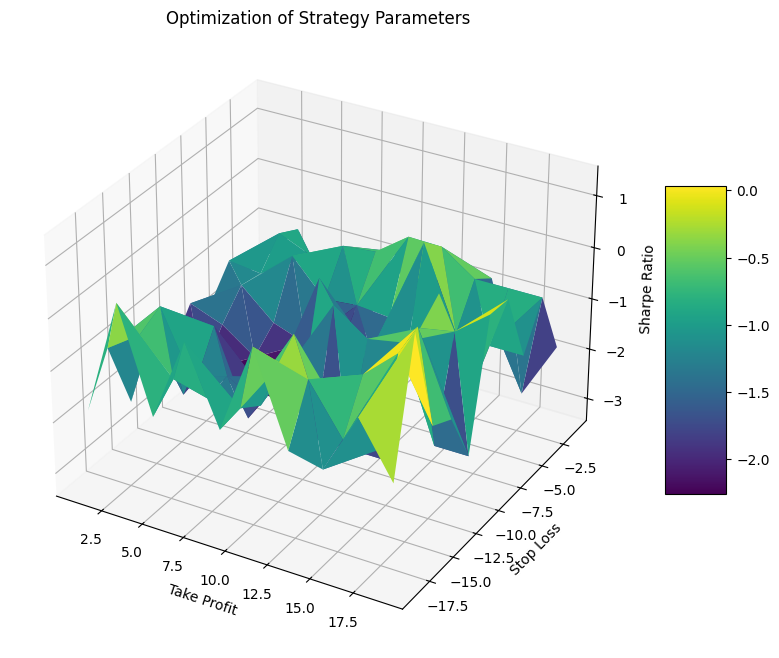

In [27]:
strategy_function = strategy_BollingerBands
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(10, 61, 5)
}
best_params_bb = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_bb = run_backtest(strategy_function(validation_db, n=int(best_params_bb['n'])), initial_capital, best_params_bb['sl'], best_params_bb['tp'])

## CCI

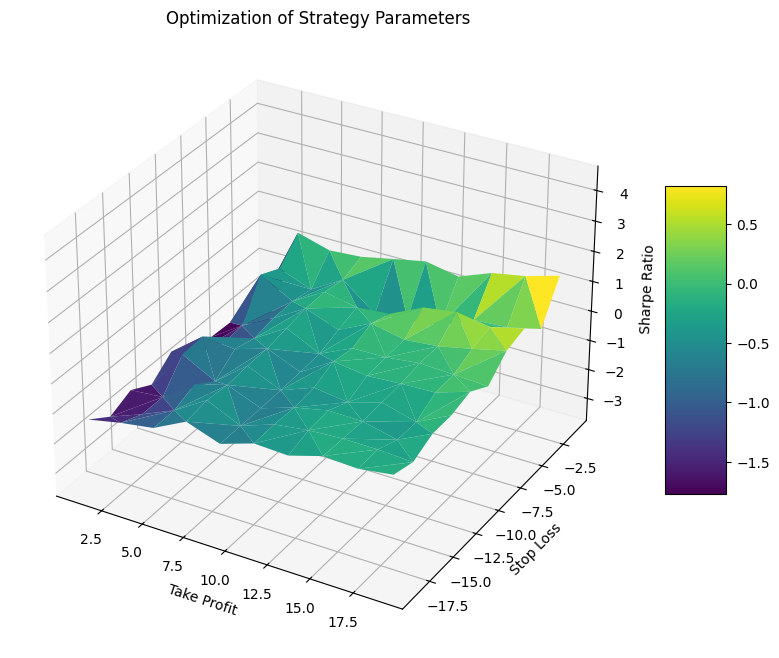

In [28]:
strategy_function = strategy_CCI
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n_cci': range(10, 61, 5),
    'n_sma': range(10, 61, 5),
    'livello': range(0, 51, 5)
}
best_params_cci = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_cci = run_backtest(strategy_function(validation_db, n_cci=int(best_params_cci['n_cci']), n_sma=int(best_params_cci['n_sma']), livello=int(best_params_cci['livello'])), initial_capital, best_params_cci['sl'], best_params_cci['tp'])

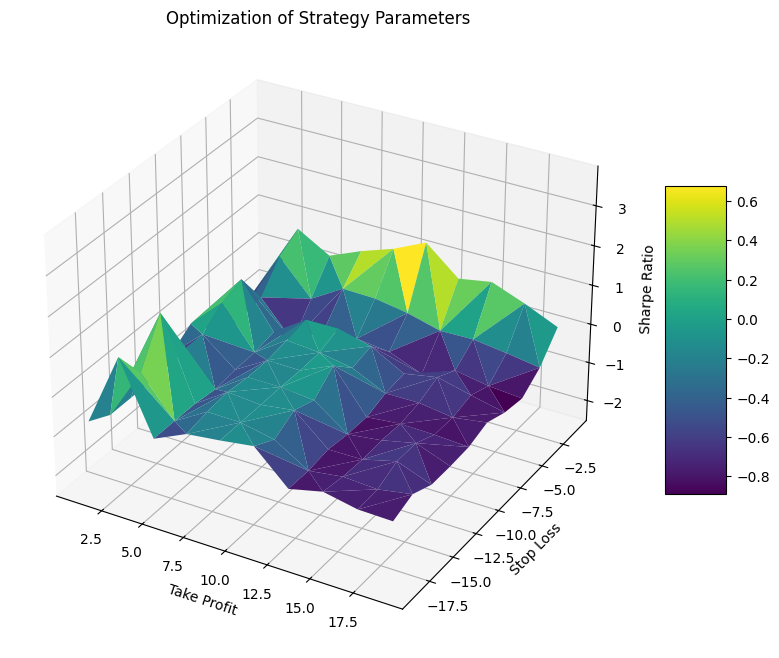

In [29]:
strategy_function = strategy_CCI_2
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n_cci': range(20, 71, 5),
    'n_sma': range(20, 71, 5),
    'livello': range(0, 51, 5)
}
best_params_cci2 = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_cci2 = run_backtest(strategy_function(validation_db, n_cci=int(best_params_cci2['n_cci']), n_sma=int(best_params_cci2['n_sma']), livello=int(best_params_cci2['livello'])), initial_capital, best_params_cci2['sl'], best_params_cci2['tp'])

## HMA & Tether Line

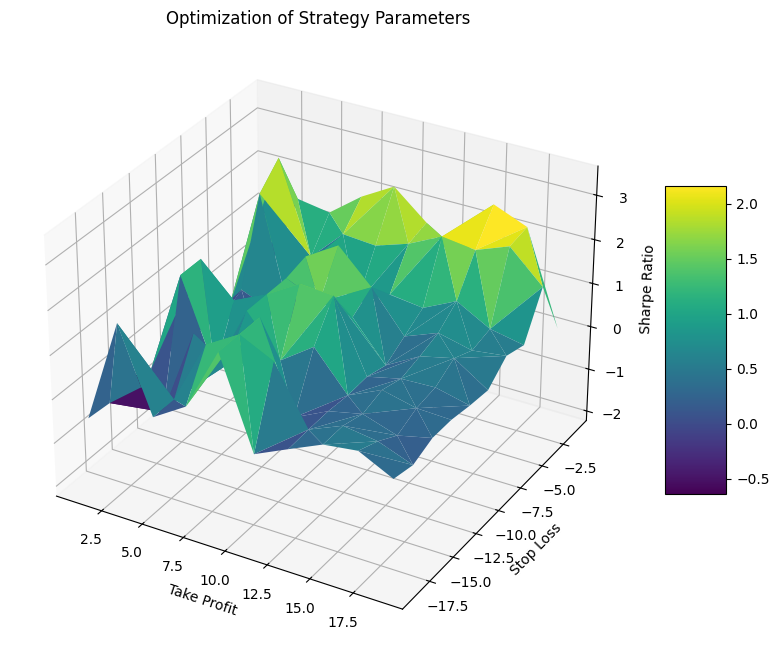

In [30]:
strategy_function = strategy_HMA_Tether
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n_hma': range(20, 71, 5),
    'n_tether': range(20, 71, 5)
}
best_params_hma = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_hma = run_backtest(strategy_function(validation_db, n_hma=int(best_params_hma['n_hma']), n_tether=int(best_params_hma['n_tether'])), initial_capital, best_params_hma['sl'], best_params_hma['tp'])

## Ichimoku

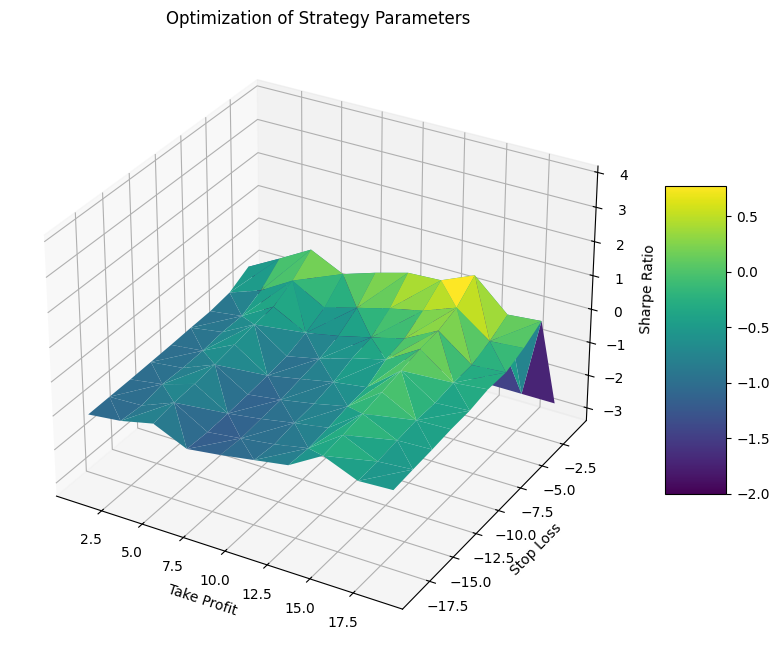

In [31]:
strategy_function = strategy_Ichimoku
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n_conv': range(5, 15, 1),
    'n_base': range(20, 31, 1),
    'n_span_b': range(20, 31, 1)
}
best_params_ichimoku = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_ichimoku = run_backtest(strategy_function(validation_db, n_conv=int(best_params_ichimoku['n_conv']), n_base=int(best_params_ichimoku['n_base']), n_span_b=int(best_params_ichimoku['n_span_b'])), initial_capital, best_params_ichimoku['sl'], best_params_ichimoku['tp'])

## KAMA

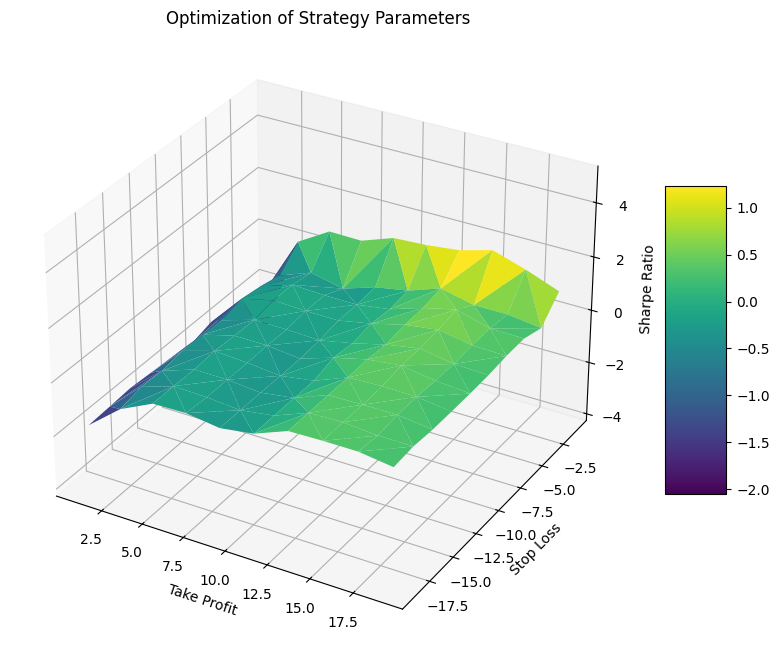

In [32]:
strategy_function = strategy_KAMA
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(5, 56, 5),
    'f': range(1, 11, 1),
    'l': range(20, 71, 5)
}
best_params_KAMA = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_KAMA = run_backtest(strategy_function(validation_db, n=int(best_params_KAMA['n']), f=int(best_params_KAMA['f']), l=int(best_params_KAMA['l'])), initial_capital, best_params_KAMA['sl'], best_params_KAMA['tp'])

## Keltner

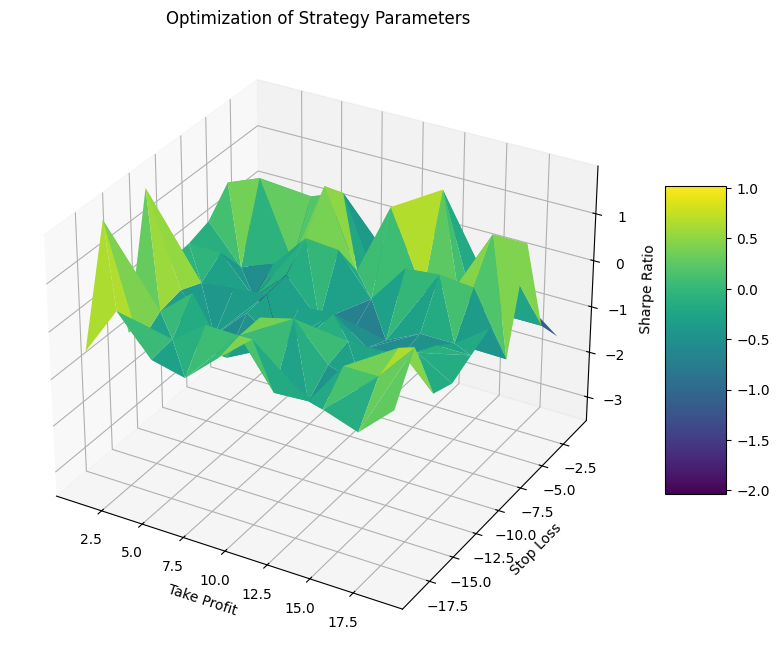

In [33]:
strategy_function = strategy_Keltner
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(10, 61, 5),
    'k': range(1,2,1)
}
best_params_keltner = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_keltner = run_backtest(strategy_function(validation_db, n=int(best_params_keltner['n']), k=int(best_params_keltner['k'])), initial_capital, best_params_keltner['sl'], best_params_keltner['tp'])

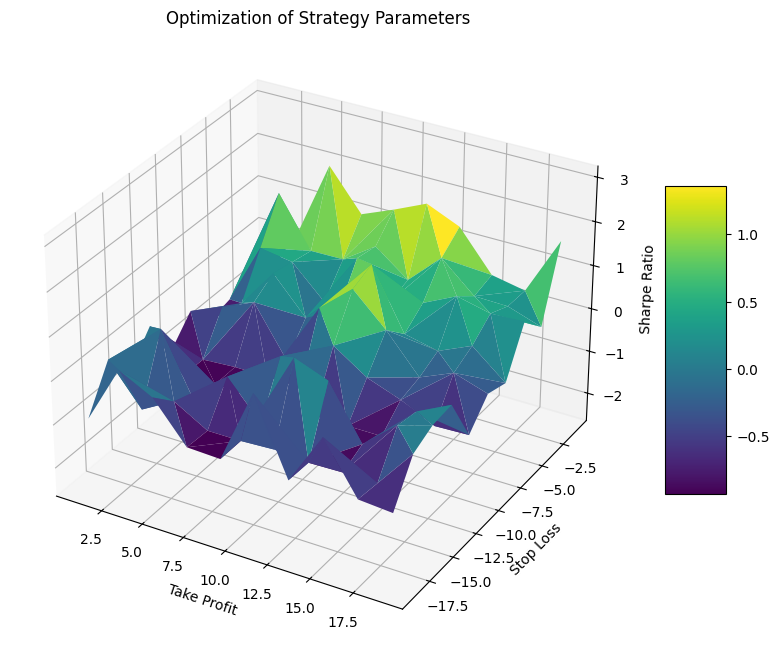

In [34]:
strategy_function = strategy_Keltner_break
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(10, 61, 5),
    'k': range(1,2,1)
}
best_params_keltner_break = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_keltner_break = run_backtest(strategy_function(validation_db, n=int(best_params_keltner_break['n']),  k=int(best_params_keltner['k'])), initial_capital, best_params_keltner_break['sl'], best_params_keltner_break['tp'])

## MACD

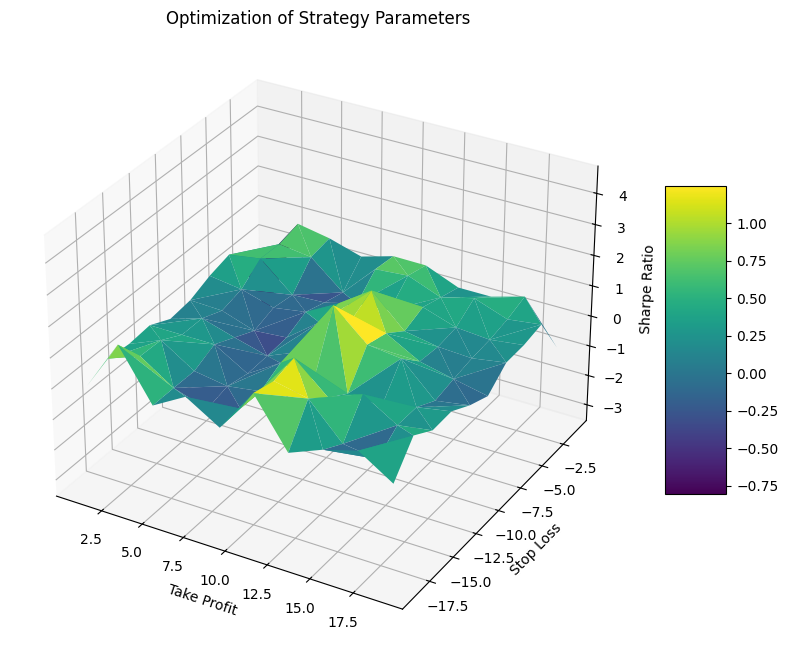

In [35]:
strategy_function = strategy_MACD
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n_slow': range(20, 31, 1),
    'n_fast': range(7, 18, 1),
    'n_sign': range(5, 16, 1)
}
best_params_macd = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_macd = run_backtest(strategy_function(validation_db, n_slow=int(best_params_macd['n_slow']), n_fast=int(best_params_macd['n_fast']), n_sign=int(best_params_macd['n_sign'])), initial_capital, best_params_macd['sl'], best_params_macd['tp'])

## OBV

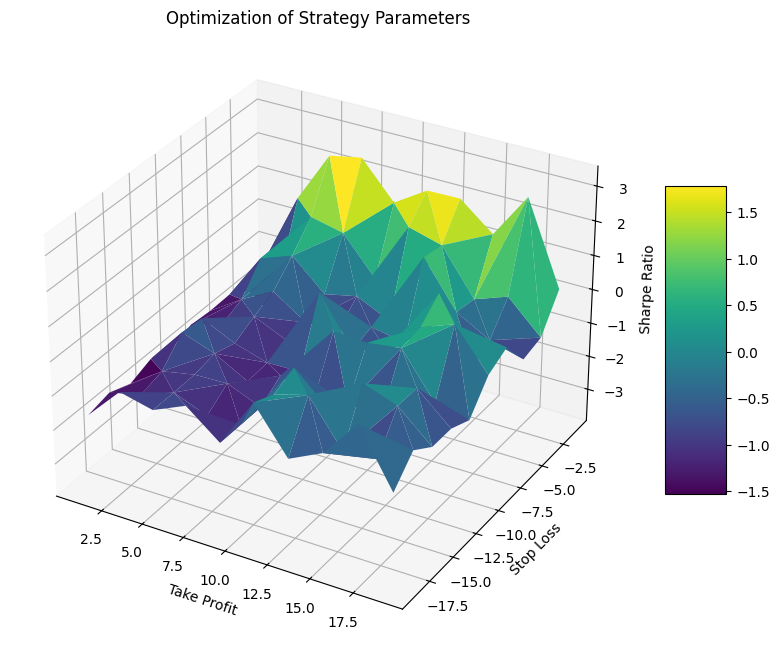

In [36]:
strategy_function = strategy_OBV
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(20, 71, 5)
}
best_params_obv = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_obv = run_backtest(strategy_function(validation_db, n=int(best_params_obv['n'])), initial_capital, best_params_obv['sl'], best_params_obv['tp'])

## Oscillatore Stocastico

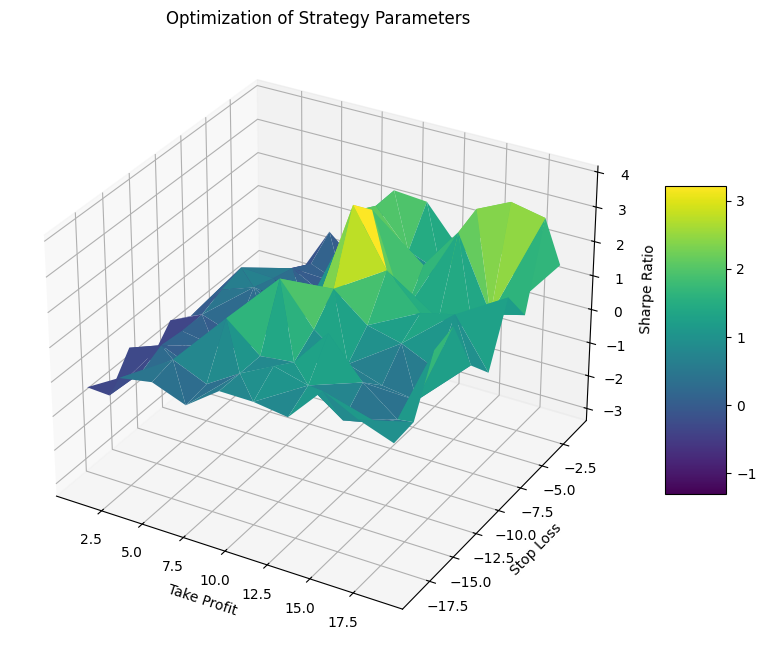

In [37]:
strategy_function = strategy_Stocastico
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'k': range(10, 61, 5)
}
best_params_stoch = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_stoch = run_backtest(strategy_function(validation_db, k=int(best_params_stoch['k'])), initial_capital, best_params_stoch['sl'], best_params_stoch['tp'])

## Parabolic SAR

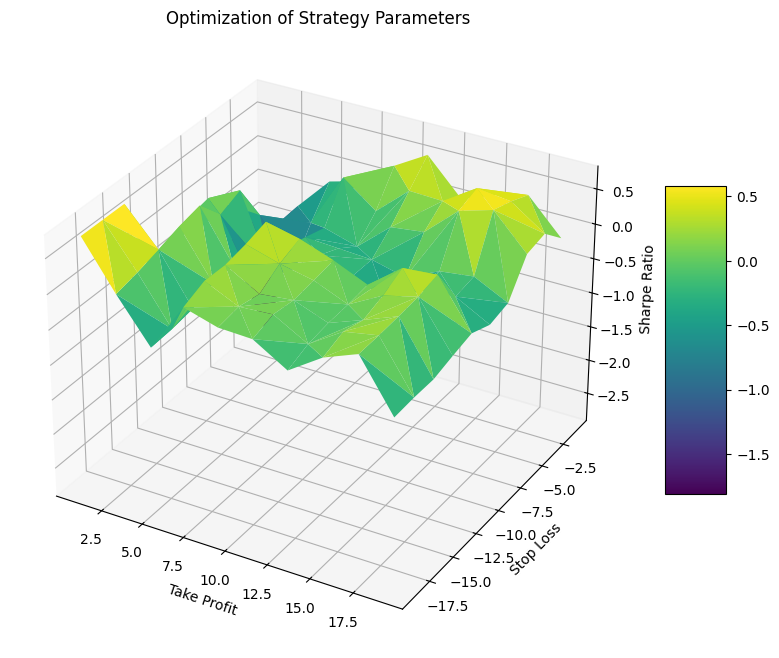

In [38]:
strategy_function = strategy_PSAR
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)]
}
best_params_sar = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_sar = run_backtest(strategy_function(validation_db), initial_capital, best_params_sar['sl'], best_params_sar['tp'])

## Williams%R

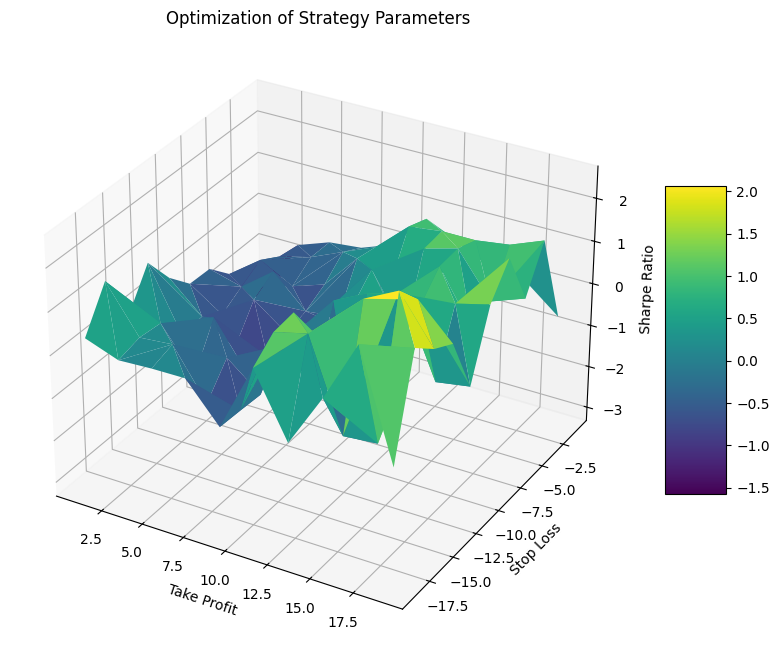

In [39]:
strategy_function = strategy_WR
param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)],
    'n': range(10, 21, 1)
}
best_params_wr = optimize_strategy_and_show_chart(validation_db, strategy_function, param_grid, initial_capital)
db_stats_wr = run_backtest(strategy_function(validation_db, n=int(best_params_wr['n'])), initial_capital, best_params_wr['sl'], best_params_wr['tp'])

## Report

In [40]:
report_ax = report(db_statsX,db_statsX['P&L'],db_statsX['RIT_CUM'])
report_ay = report(db_statsY,db_statsY['P&L'],db_statsY['RIT_CUM'])
report_bb = report(db_stats_bb,db_stats_bb['P&L'],db_stats_bb['RIT_CUM'])
report_cci = report(db_stats_cci,db_stats_cci['P&L'],db_stats_cci['RIT_CUM'])
report_cci2 = report(db_stats_cci2,db_stats_cci2['P&L'],db_stats_cci2['RIT_CUM'])
report_hma = report(db_stats_hma,db_stats_hma['P&L'],db_stats_hma['RIT_CUM'])
report_ichimoku = report(db_stats_ichimoku,db_stats_ichimoku['P&L'],db_stats_ichimoku['RIT_CUM'])
report_kama = report(db_stats_KAMA,db_stats_KAMA['P&L'],db_stats_KAMA['RIT_CUM'])
report_keltner = report(db_stats_keltner,db_stats_keltner['P&L'],db_stats_keltner['RIT_CUM'])
report_keltner_break = report(db_stats_keltner_break,db_stats_keltner_break['P&L'],db_stats_keltner_break['RIT_CUM'])
report_macd = report(db_stats_macd,db_stats_macd['P&L'],db_stats_macd['RIT_CUM'])
report_obv = report(db_stats_obv,db_stats_obv['P&L'],db_stats_obv['RIT_CUM'])
report_stoch = report(db_stats_stoch,db_stats_stoch['P&L'],db_stats_stoch['RIT_CUM'])
report_sar = report(db_stats_sar,db_stats_sar['P&L'],db_stats_sar['RIT_CUM'])
report_wr = report(db_stats_wr,db_stats_wr['P&L'],db_stats_wr['RIT_CUM'])

In [41]:
df_report_validation = pd.DataFrame([report_ax, report_ay, report_bb, report_cci, report_cci2, report_hma, report_ichimoku, report_kama, report_keltner, report_keltner_break, report_macd, report_obv, report_stoch, report_sar, report_wr], index=['Aaron X', 'AaronY', 'Bollinger Bands', 'CCI', 'CCI2', 'HMA', 'Ichimoku', 'KAMA', 'Keltner', 'Keltner Break', 'MACD', 'OBV', 'Stochastic', 'SAR', 'W%R'])

df_report_validation

Ritorno Ann  Volatilità Ann  Profitto  Profitto Buy&Hold  \
Aaron X                17.58            6.96    1439.0             7656.0   
AaronY                 53.14           16.94    4244.0             7656.0   
Bollinger Bands        28.13           19.28    2285.0             7656.0   
CCI                    99.34           21.49    7729.0             7656.0   
CCI2                   71.72           18.61    5665.0             7656.0   
HMA                    57.55           16.32    4584.0             7656.0   
Ichimoku               34.44            8.54    2785.0             7656.0   
KAMA                   80.42           15.66    6321.0             7656.0   
Keltner                22.17           11.72    1809.0             7656.0   
Keltner Break          67.32           21.48    5331.0             7656.0   
MACD                  136.78           29.09   10453.0             7656.0   
OBV                    83.42           24.39    6546.0             7656.0   
Stochastic            204.61           50.85   15210.0             7656.0   
SAR                    10.78           14.31     887.0             7656.0   
W%R                   155.41           59.35   11780.0             7656.0   

                 Operazioni Chiuse  Operazioni Long  Operazioni Short  \
Aaron X                          2                1                 1   
AaronY                           3                2                 1   
Bollinger Bands                  8                3                 5   
CCI                              7                4                 3   
CCI2                             8                4                 4   
HMA                              6                3                 3   
Ichimoku                         9                3                 6   
KAMA                            19               10                11   
Keltner                         18                6                12   
Keltner Break                   22               13                 9   
MACD                            20               10                10   
OBV                             35               19                19   
Stochastic                      48               25                25   
SAR                             24               12                13   
W%R                             18                9                10   

                 Rendimento Medio  Rendimento Medio %  Dev. Std Rend. Med  \
Aaron X                     719.0                8.00               12.72   
AaronY                     1415.0               15.47               10.22   
Bollinger Bands             286.0                3.97                9.83   
CCI                        1104.0                9.38                0.48   
CCI2                        708.0                6.57                5.07   
HMA                         764.0                7.54                6.44   
Ichimoku                    309.0                3.06                0.05   
KAMA                        361.0                3.05                0.05   
Keltner                     100.0                1.01                0.00   
Keltner Break               242.0                2.46                6.87   
MACD                        523.0                4.18                4.82   
OBV                         185.0                1.68                4.56   
Stochastic                  305.0                2.43                7.19   
SAR                          64.0                0.67                1.64   
W%R                         629.0                6.39               13.65   

                 Profit Factor  Profitto Lordo  Perdita Lorda  \
Aaron X           1.647000e+01          1532.0          -93.0   
AaronY            4.244000e+11          4244.0            0.0   
Bollinger Bands   2.570000e+00          3739.0        -1454.0   
CCI               7.729000e+11          7729.0            0.0   
CCI2              1.970000e+01          5968.0         -3

In [66]:
#df_report_validation.to_excel('report_strats_validation.xlsx')

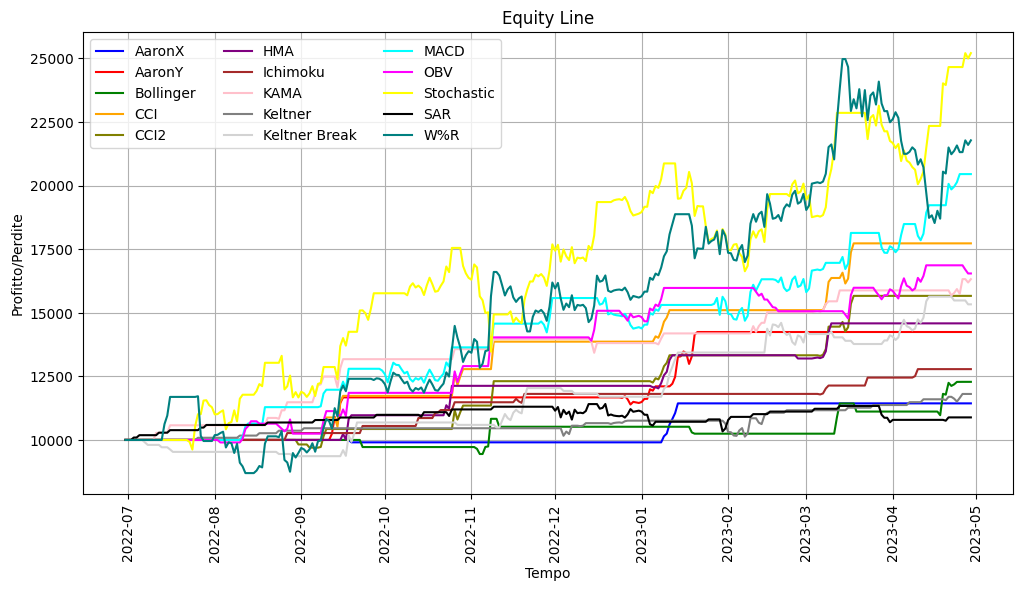

In [43]:
plot_equity(
    ('AaronX', db_statsX['RIT_CUM']),
    ('AaronY', db_statsY['RIT_CUM']),
    ('Bollinger', db_stats_bb['RIT_CUM']),
    ('CCI', db_stats_cci['RIT_CUM']),
    ('CCI2', db_stats_cci2['RIT_CUM']),
    ('HMA', db_stats_hma['RIT_CUM']),
    ('Ichimoku', db_stats_ichimoku['RIT_CUM']),
    ('KAMA', db_stats_KAMA['RIT_CUM']),
    ('Keltner', db_stats_keltner['RIT_CUM']),
    ('Keltner Break', db_stats_keltner_break['RIT_CUM']),
    ('MACD', db_stats_macd['RIT_CUM']),
    ('OBV', db_stats_obv['RIT_CUM']),
    ('Stochastic', db_stats_stoch['RIT_CUM']),
    ('SAR', db_stats_sar['RIT_CUM']),
    ('W%R', db_stats_wr['RIT_CUM']),
    colors=(
        'blue', 'red', 'green', 'orange', 'olive', 'purple',
        'brown', 'pink', 'gray', 'lightgray', 'cyan', 'magenta',
        'yellow', 'black', 'teal'
    )
)

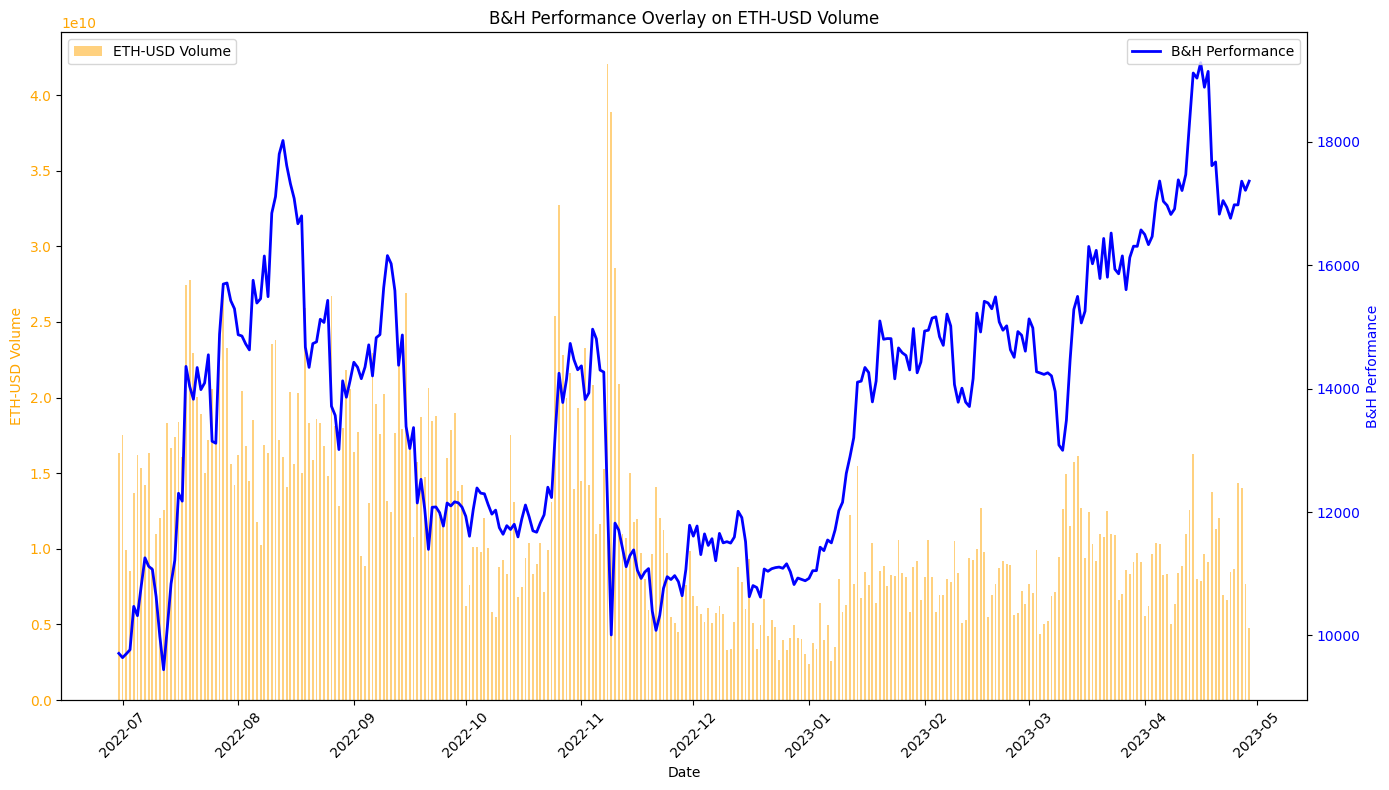

In [44]:
plot_bh_on_volume(validation_db, db_stats_wr)

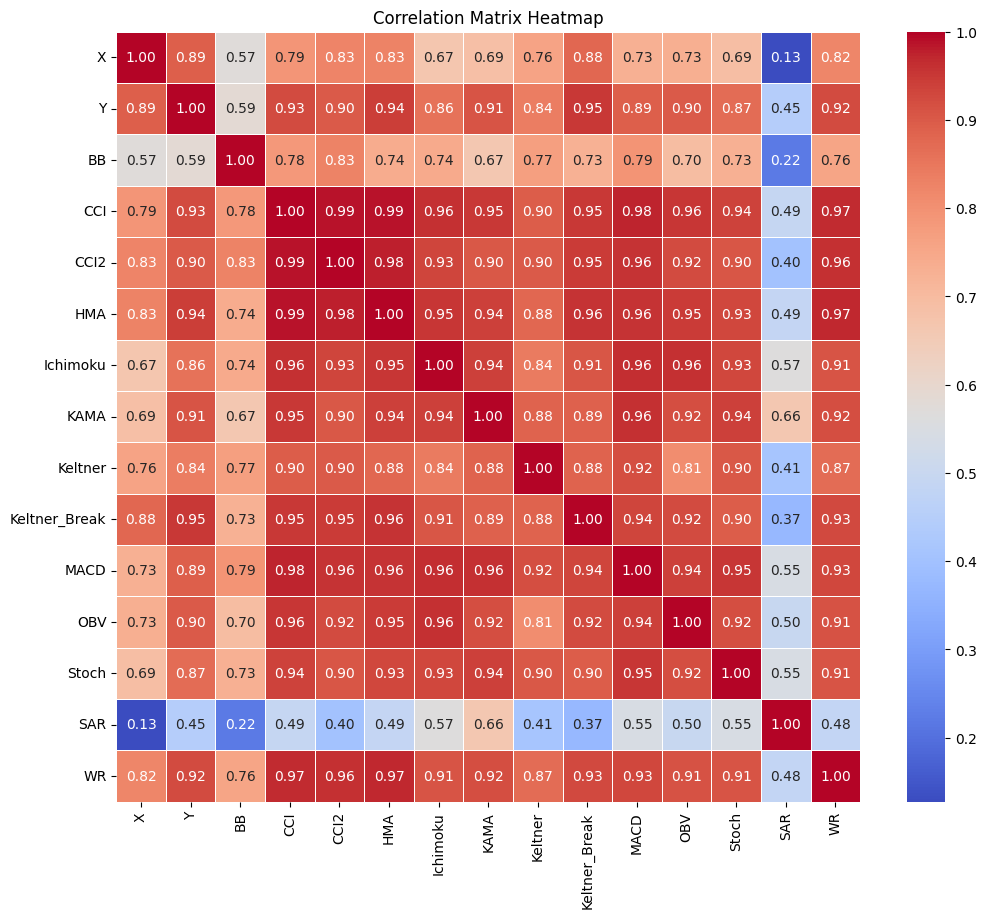

In [45]:
strategies_df = pd.DataFrame({
    'X': db_statsX['RIT_CUM'],
    'Y': db_statsY['RIT_CUM'],
    'BB': db_stats_bb['RIT_CUM'],
    'CCI': db_stats_cci['RIT_CUM'],
    'CCI2': db_stats_cci2['RIT_CUM'],
    'HMA': db_stats_hma['RIT_CUM'],
    'Ichimoku': db_stats_ichimoku['RIT_CUM'],
    'KAMA': db_stats_KAMA['RIT_CUM'],
    'Keltner': db_stats_keltner['RIT_CUM'],
    'Keltner_Break': db_stats_keltner_break['RIT_CUM'],
    'MACD': db_stats_macd['RIT_CUM'],
    'OBV': db_stats_obv['RIT_CUM'],
    'Stoch': db_stats_stoch['RIT_CUM'],
    'SAR': db_stats_sar['RIT_CUM'],
    'WR': db_stats_wr['RIT_CUM']
})
correlation_matrix = strategies_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Test

## Aaron

In [46]:
db_strategiaX= strategy_AROON_Xcross(test_db, n=int(best_paramsX['n']))
db_strategiaY= strategy_AROON_Ycross(test_db, n=int(best_paramsY['n']), livello=int(best_paramsY['livello']))
db_statsX=run_backtest(db_strategiaX, initial_capital, sl=best_paramsX['sl'], tp=best_paramsX['tp'])
db_statsY=run_backtest(db_strategiaY, initial_capital, sl=best_paramsY['sl'], tp=best_paramsY['tp'])

## Bollinger Bands

In [47]:
db_strategia= strategy_BollingerBands(test_db, n=int(best_params_bb['n']))
db_stats_bb=run_backtest(db_strategia, initial_capital, sl=best_params_bb['sl'], tp=best_params_bb['tp'])

## CCI

In [48]:
db_strategia= strategy_CCI(test_db,n_cci=int(best_params_cci['n_cci']),n_sma=int(best_params_cci['n_sma']),livello=int(best_params_cci['livello']))
db_stats_cci=run_backtest(db_strategia, initial_capital, sl=best_params_cci['sl'], tp=best_params_cci['tp'])

In [49]:
db_strategia= strategy_CCI_2(test_db,n_cci=int(best_params_cci2['n_cci']),n_sma=int(best_params_cci2['n_sma']),livello=int(best_params_cci2['livello']))
db_stats_cci2=run_backtest(db_strategia, initial_capital, sl=best_params_cci2['sl'], tp=best_params_cci2['tp'])

## HMA & Tether Line

In [50]:
db_strategia= strategy_HMA_Tether(test_db,n_hma=int(best_params_hma['n_hma']),n_tether=int(best_params_hma['n_tether']))
db_stats_hma=run_backtest(db_strategia, initial_capital, sl=best_params_hma['sl'], tp=best_params_hma['tp'])

## Ichimoku

In [51]:
db_strategia= strategy_Ichimoku(test_db, n_conv=int(best_params_ichimoku['n_conv']), n_base=int(best_params_ichimoku['n_base']), n_span_b=int(best_params_ichimoku['n_span_b']))
db_stats_ichimoku=run_backtest(db_strategia, initial_capital, sl=best_params_ichimoku['sl'], tp=best_params_ichimoku['tp'])

## KAMA

In [52]:
test_db = test_db.copy()
test_db['kama'] = ta.momentum.KAMAIndicator(test_db['close'], 30, 2, 10).kama()
db_strategia_KAMA= strategy_KAMA(test_db, n=int(best_params_KAMA['n']),f=int(best_params_KAMA['f']),l=int(best_params_KAMA['l']))
db_stats_KAMA=run_backtest(db_strategia_KAMA, initial_capital, sl=best_params_KAMA['sl'], tp=best_params_KAMA['tp'])

## Keltner

In [53]:
db_strategia= strategy_Keltner(test_db, n=int(best_params_keltner['n']), k=int(best_params_keltner['k']))
db_stats_keltner=run_backtest(db_strategia, initial_capital, sl=best_params_keltner['sl'], tp=best_params_keltner['tp'])

In [54]:
db_strategia= strategy_Keltner_break(test_db, n=int(best_params_keltner_break['n']), k=int(best_params_keltner['k']))
db_stats_keltner_break=run_backtest(db_strategia, initial_capital, sl=best_params_keltner_break['sl'], tp=best_params_keltner_break['tp'])

## MACD

In [55]:
db_strategia= strategy_MACD(test_db, n_slow= int(best_params_macd['n_slow']),n_fast= int(best_params_macd['n_fast']),n_sign=int(best_params_macd['n_sign']))
db_stats_macd=run_backtest(db_strategia, initial_capital, sl=best_params_macd['sl'], tp=best_params_macd['tp'])

## OBV

In [56]:
db_strategia= strategy_OBV(test_db, n=int(best_params_obv['n']))
db_stats_obv=run_backtest(db_strategia, initial_capital, sl=best_params_obv['sl'], tp=best_params_obv['tp'])

## Oscillatore Stocastico

In [57]:
db_strategia= strategy_Stocastico(test_db, k=int(best_params_stoch['k']))
db_stats_stoch=run_backtest(db_strategia, initial_capital, sl=best_params_stoch['sl'], tp=best_params_stoch['tp'])

## Parabolic SAR

In [58]:
db_strategia= strategy_PSAR(test_db)
db_stats_sar=run_backtest(db_strategia, initial_capital, sl=best_params_sar['sl'], tp=best_params_sar['tp'])

## Williams%R

In [59]:
db_strategia= strategy_WR(test_db, n=int(best_params_wr['n']))
db_stats_wr=run_backtest(db_strategia, initial_capital, sl=best_params_wr['sl'], tp=best_params_wr['tp'])

## Report

In [60]:
report_ax = report(db_statsX,db_statsX['P&L'],db_statsX['RIT_CUM'])
report_ay = report(db_statsY,db_statsY['P&L'],db_statsY['RIT_CUM'])
report_bb = report(db_stats_bb,db_stats_bb['P&L'],db_stats_bb['RIT_CUM'])
report_cci = report(db_stats_cci,db_stats_cci['P&L'],db_stats_cci['RIT_CUM'])
report_cci2 = report(db_stats_cci2,db_stats_cci2['P&L'],db_stats_cci2['RIT_CUM'])
report_hma = report(db_stats_hma,db_stats_hma['P&L'],db_stats_hma['RIT_CUM'])
report_ichimoku = report(db_stats_ichimoku,db_stats_ichimoku['P&L'],db_stats_ichimoku['RIT_CUM'])
report_kama = report(db_stats_KAMA,db_stats_KAMA['P&L'],db_stats_KAMA['RIT_CUM'])
report_keltner = report(db_stats_keltner,db_stats_keltner['P&L'],db_stats_keltner['RIT_CUM'])
report_keltner_break = report(db_stats_keltner_break,db_stats_keltner_break['P&L'],db_stats_keltner_break['RIT_CUM'])
report_macd = report(db_stats_macd,db_stats_macd['P&L'],db_stats_macd['RIT_CUM'])
report_obv = report(db_stats_obv,db_stats_obv['P&L'],db_stats_obv['RIT_CUM'])
report_stoch = report(db_stats_stoch,db_stats_stoch['P&L'],db_stats_stoch['RIT_CUM'])
report_sar = report(db_stats_sar,db_stats_sar['P&L'],db_stats_sar['RIT_CUM'])
report_wr = report(db_stats_wr,db_stats_wr['P&L'],db_stats_wr['RIT_CUM'])

In [61]:
df_report_test = pd.DataFrame([report_ax, report_ay, report_bb, report_cci, report_cci2, report_hma, report_ichimoku, report_kama, report_keltner, report_keltner_break, report_macd, report_obv, report_stoch, report_sar, report_wr], index=['Aaron X', 'AaronY', 'Bollinger Bands', 'CCI', 'CCI2', 'HMA', 'Ichimoku', 'KAMA', 'Keltner', 'Keltner Break', 'MACD', 'OBV', 'Stochastic', 'SAR', 'W%R'])

df_report_test

Ritorno Ann  Volatilità Ann  Profitto  Profitto Buy&Hold  \
Aaron X                16.17           14.62    1325.0             7165.0   
AaronY                 20.66           15.40    1687.0             7165.0   
Bollinger Bands        16.06           11.91    1316.0             7165.0   
CCI                    14.82           12.91    1215.0             7165.0   
CCI2                   23.34           15.51    1903.0             7165.0   
HMA                     9.36           11.77     771.0             7165.0   
Ichimoku                1.24            9.67     103.0             7165.0   
KAMA                    0.98           15.22      82.0             7165.0   
Keltner                14.94           12.09    1226.0             7165.0   
Keltner Break          45.63           16.67    3663.0             7165.0   
MACD                  -26.62           28.38   -2266.0             7165.0   
OBV                    69.69           20.20    5512.0             7165.0   
Stochastic             94.12           36.92    7343.0             7165.0   
SAR                    14.38           15.12    1180.0             7165.0   
W%R                    59.51           39.02    4735.0             7165.0   

                 Operazioni Chiuse  Operazioni Long  Operazioni Short  \
Aaron X                          3                2                 1   
AaronY                           2                1                 2   
Bollinger Bands                  8                3                 5   
CCI                              7                3                 4   
CCI2                            10                4                 6   
HMA                              9                7                 2   
Ichimoku                         8                4                 4   
KAMA                            28               17                14   
Keltner                         15                4                11   
Keltner Break                   11                7                 4   
MACD                            24               12                12   
OBV                             25               13                13   
Stochastic                      43               22                22   
SAR                             21               11                11   
W%R                             22               11                11   

                 Rendimento Medio  Rendimento Medio %  Dev. Std Rend. Med  \
Aaron X                     442.0                5.00               10.39   
AaronY                      143.0                2.95               12.44   
Bollinger Bands             165.0                1.99                5.71   
CCI                         174.0                2.11                6.82   
CCI2                        190.0                2.25                6.16   
HMA                          86.0                1.14                4.07   
Ichimoku                     13.0                0.22                4.00   
KAMA                         12.0                0.20                3.01   
Keltner                      82.0                0.87                0.53   
Keltner Break               333.0                3.61                7.91   
MACD                        -94.0               -0.86                6.61   
OBV                         223.0                2.12                4.61   
Stochastic                  155.0                1.53                5.60   
SAR                          94.0                1.00                0.01   
W%R                         215.0                2.59                8.61   

                 Profit Factor  Profitto Lordo  Perdita Lorda  \
Aaron X           8.530000e+00          1501.0         -176.0   
AaronY            1.420000e+00           960.0         -674.0   
Bollinger Bands   2.040000e+00          2585.0        -1268.0   
CCI               1.890000e+00          2590.0        -1374.0   
CCI2              2.270000e+00          3402.0        -14

In [62]:
#df_report_test.to_excel('report_strats_test.xlsx')

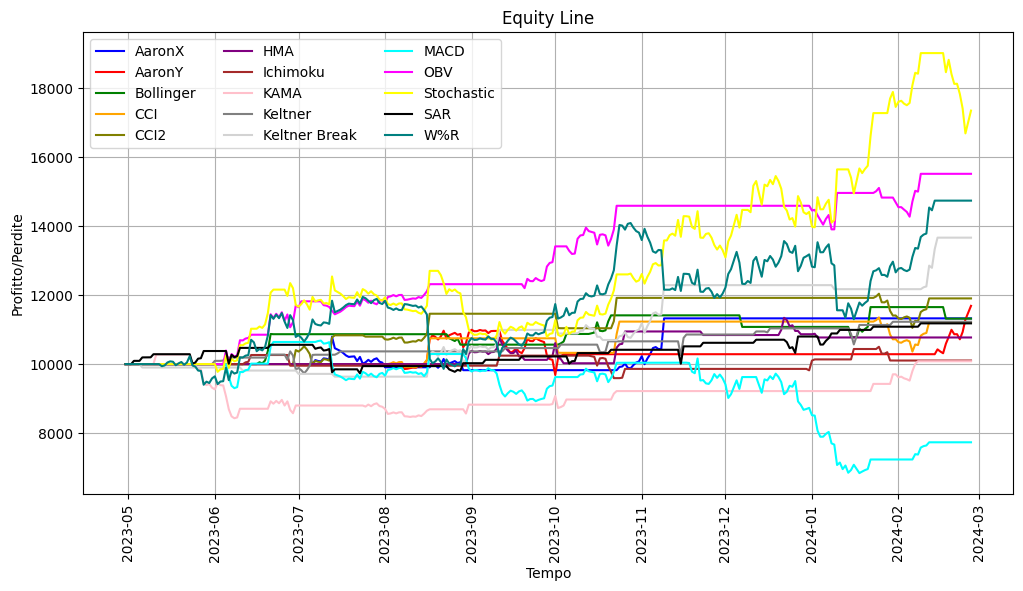

In [63]:
plot_equity(
    ('AaronX', db_statsX['RIT_CUM']),
    ('AaronY', db_statsY['RIT_CUM']),
    ('Bollinger', db_stats_bb['RIT_CUM']),
    ('CCI', db_stats_cci['RIT_CUM']),
    ('CCI2', db_stats_cci2['RIT_CUM']),
    ('HMA', db_stats_hma['RIT_CUM']),
    ('Ichimoku', db_stats_ichimoku['RIT_CUM']),
    ('KAMA', db_stats_KAMA['RIT_CUM']),
    ('Keltner', db_stats_keltner['RIT_CUM']),
    ('Keltner Break', db_stats_keltner_break['RIT_CUM']),
    ('MACD', db_stats_macd['RIT_CUM']),
    ('OBV', db_stats_obv['RIT_CUM']),
    ('Stochastic', db_stats_stoch['RIT_CUM']),
    ('SAR', db_stats_sar['RIT_CUM']),
    ('W%R', db_stats_wr['RIT_CUM']),
    colors=(
        'blue', 'red', 'green', 'orange', 'olive', 'purple',
        'brown', 'pink', 'gray', 'lightgray', 'cyan', 'magenta',
        'yellow', 'black', 'teal'
    )
)

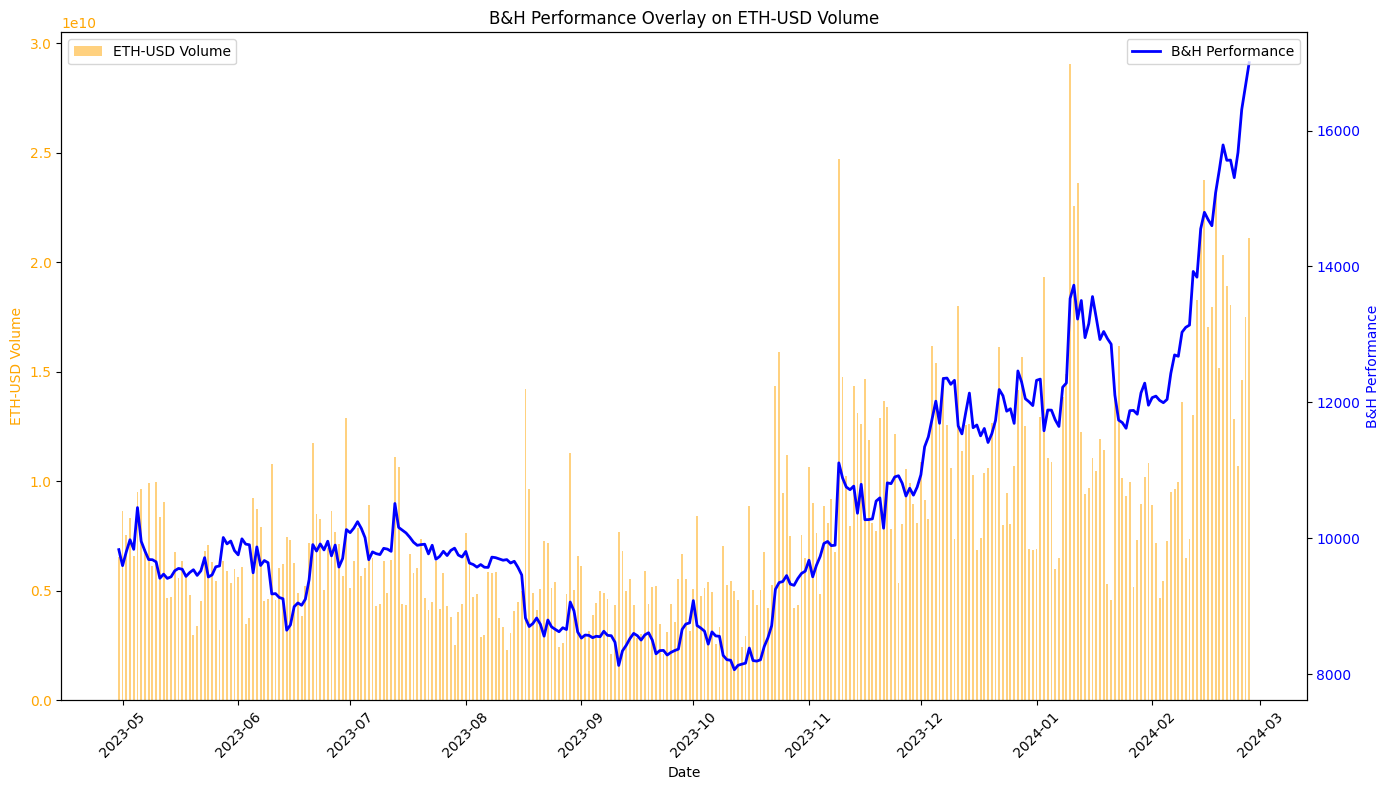

In [64]:
plot_bh_on_volume(test_db, db_stats_wr)

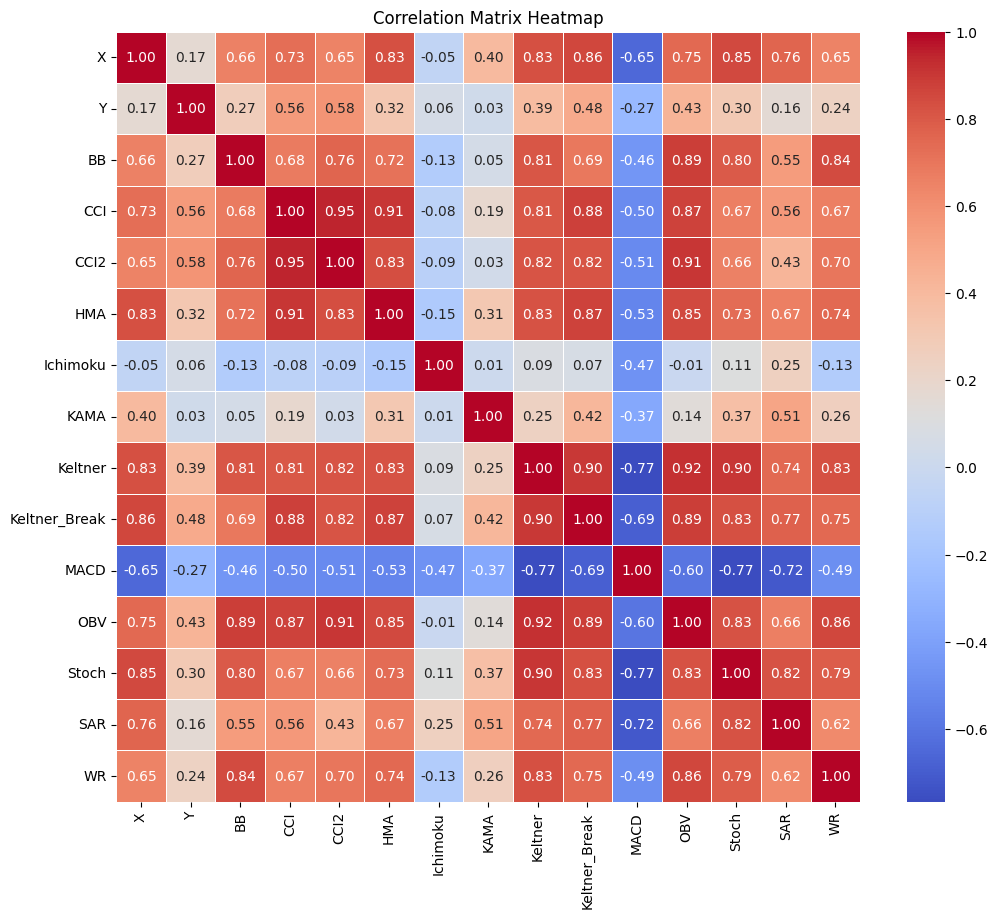

In [65]:
strategies_df = pd.DataFrame({
    'X': db_statsX['RIT_CUM'],
    'Y': db_statsY['RIT_CUM'],
    'BB': db_stats_bb['RIT_CUM'],
    'CCI': db_stats_cci['RIT_CUM'],
    'CCI2': db_stats_cci2['RIT_CUM'],
    'HMA': db_stats_hma['RIT_CUM'],
    'Ichimoku': db_stats_ichimoku['RIT_CUM'],
    'KAMA': db_stats_KAMA['RIT_CUM'],
    'Keltner': db_stats_keltner['RIT_CUM'],
    'Keltner_Break': db_stats_keltner_break['RIT_CUM'],
    'MACD': db_stats_macd['RIT_CUM'],
    'OBV': db_stats_obv['RIT_CUM'],
    'Stoch': db_stats_stoch['RIT_CUM'],
    'SAR': db_stats_sar['RIT_CUM'],
    'WR': db_stats_wr['RIT_CUM']
})
correlation_matrix = strategies_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### To do:
- Ottimizzazione basata su altre metriche (Burke, Sortino, etc)
- Mix strategies